# **About the dataset**
**About the dataset:** This dataset consists of the grades obtained by students in various subjects.

**Introduction:** Let's try to understand the influence of parental background, test preparation, etc. on student performance.

[Data link](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data?select=StudentsPerformance.csv)

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
df = pd.read_csv('StudentsPerformance.csv')
#Displaying the shape of the dataset
df.shape

(1000, 8)

In [4]:
#Displaying the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Checking for null values in the dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

As it contains no null values, we will continue with the analysis

In [6]:
#Displaying the number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
#Checking for duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [8]:
#Verified data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#Checking the statistical values of data of type int
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Percentage distribution of object-type data

In [10]:
#Percentage distribution of genders
df['gender'].value_counts(normalize=True) * 100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [11]:
#Percentage distribution of parental level of education
df['parental level of education'].value_counts(normalize=True) * 100

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

In [12]:
#Percentage distribution of race/ethnicity 
df['race/ethnicity'].value_counts(normalize=True) * 100

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

In [13]:
#Percentage distribution of launch
df['lunch'].value_counts(normalize=True) * 100

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [14]:
#Percentage distribution of test preparation course
df['test preparation course'].value_counts(normalize=True) * 100

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

___________________________

## **Hypotheses Raised**             
* Does gender affect your grade?          
* Which groups perform best in both subjects?    
* Students with parents who have a university degree tend to get better grades
* Students with a preparatory course tend to get a better grade 

____________________

## **Comparison of grades by gender**

The boxplots below show the distribution of math, reading and writing scores for each gender.  
This is followed by a descriptive table with statistics for math scores grouped by gender.

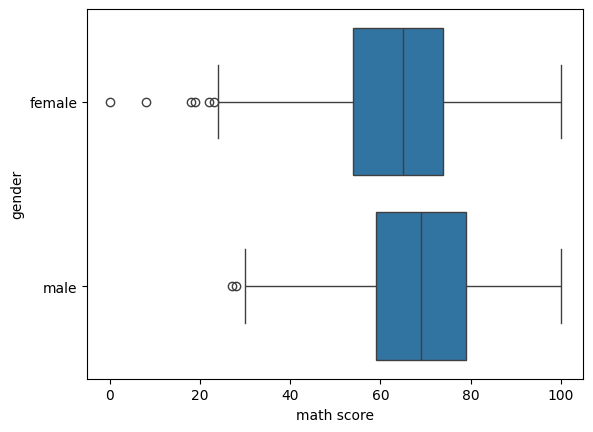

In [52]:
#Grouping the DataFrame by math score column and calculating the descriptive statistics for the gender column
sns.boxplot( data = df, x = 'math score', y = 'gender');

The overall distribution of scores is similar, but boys perform slightly better, especially in the higher scores.  
Girls show more outliers of very low scores, indicating a greater variation between the low scores of the female group.

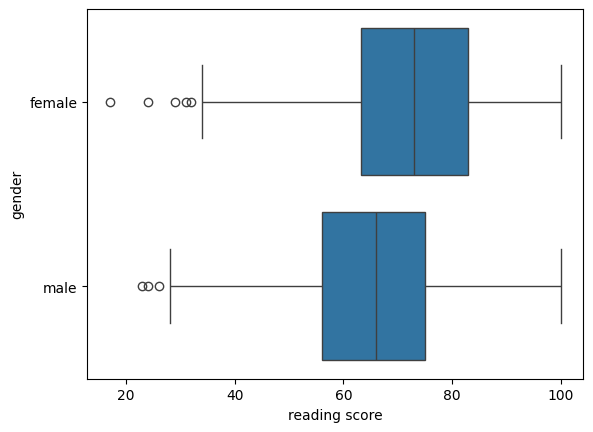

In [16]:
sns.boxplot( data = df, x = 'reading score', y = 'gender');

Girls perform better in reading, with a higher median and more grades concentrated in the upper range.  
Boys tend to have a greater downward variation in grades, with more students performing below average.

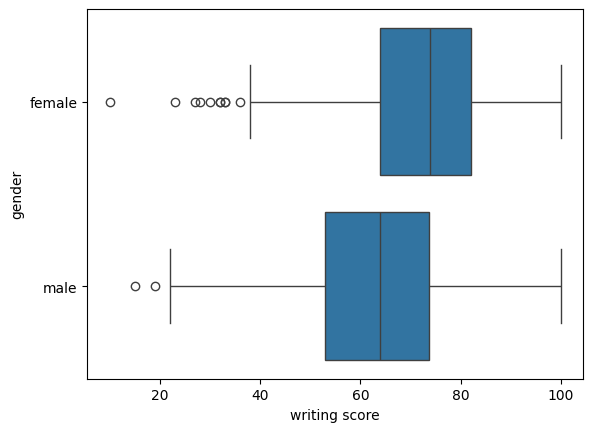

In [17]:
sns.boxplot( data = df, x = 'writing score', y = 'gender');

Girls do better in writing, in a similar way to the reading scores.  
Boys have a more dispersed distribution, with a greater presence of low scores.

Checking each material by gender:

In [18]:
#Grouping the DataFrame by gender column and calculating the descriptive statistics for the math score column
df.groupby(by = ['gender']).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


In [19]:
#Grouping the DataFrame by gender column and calculating the descriptive statistics for the reading score column
df.groupby(by = ['gender']).describe()['reading score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
1,male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


In [20]:
#Grouping the DataFrame by gender column and calculating the descriptive statistics for the writing score column
df.groupby(by = ['gender']).describe()['writing score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
1,male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


Women showed extreme outliers (scores as low as zero) in one subject: mathematics.    
This indicates that although overall performance is better in the language areas, there is a small group with marked difficulties in all three subjects.  
Among men, the outliers are less extreme (they don't reach zero), but they still represent low scores.

## **General Conclusion of the Analysis of Performance by Gender**
- Performance in Mathematics:
Boys tend to have a slightly higher median than girls.
The distribution of grades is wider for boys, but they perform relatively better in this subject.  
- Performance in Reading:
Girls stand out with a higher median and a greater concentration of good grades.
Boys show more variation and more below-average grades.    
- Performance in Writing:
As with reading, girls outperform boys, with scores more concentrated in the high range.
Boys have more dispersion and a lower overall performance in writing.

_________________________

## **Comparing the racial/ethnicity groups with the subjects covered in the Exam**

The groups were not specified in the data dictionary, so I didn't have much information

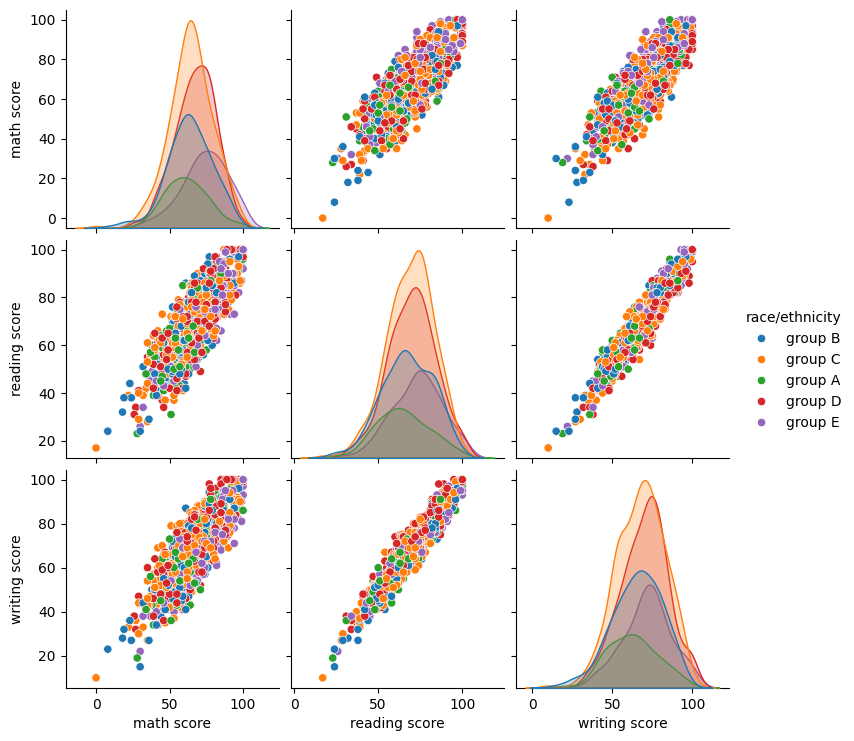

In [21]:
#Scatter matrix graph
sns.pairplot(df, hue='race/ethnicity');

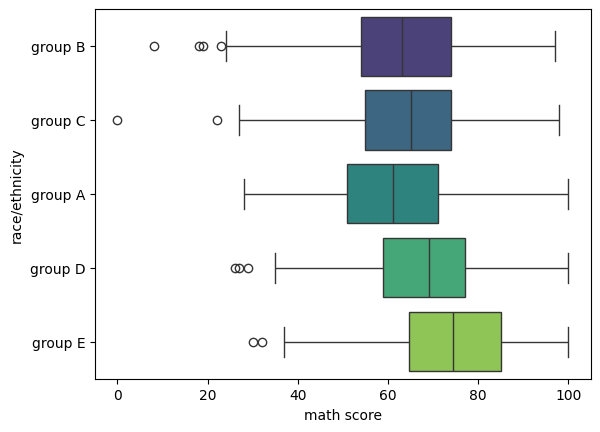

In [ ]:
#Boxplot of math score by race/ethnicity
sns.boxplot(data= df, x= 'math score', y = 'race/ethnicity', palette='viridis');

* Group C  has the best average performances in the three subjects, with distributions concentrated in high grades.
* Group A has the lowest grades on average, with a lower median especially in math.
* Group E also stands out for its high median and consistent performance.
* Group B shows the greatest dispersion in math grades, with wide variation and several outliers in very low grades.

## **Conclusion**
There are significant differences in performance between the ethnic groups. Group C, for example, shows better average performance in all subjects, while group A seems to have lower performance.

-----------------------

## **Comparing subject grades with parents level of education**

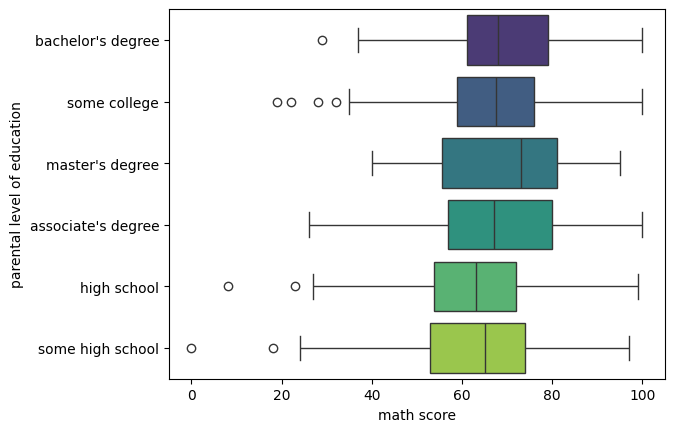

In [33]:
#Boxplot of math score by parental level of education
sns.boxplot(data= df, x= 'math score', y = 'parental level of education', palette='viridis');

Median math scores increase as parents' level of education rises.   
Students with parents who have higher education or postgraduate degrees tend to have less variation in their grades.

In [49]:
#Grouping the DataFrame by parental level of education column and calculating the descriptive statistics for the math score column
df.groupby(by = ['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


In [44]:
#Grouping the DataFrame by parental level of education column and calculating the descriptive statistics for the reading score column
df.groupby(by = ['parental level of education']).describe()['reading score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
1,bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
2,high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
3,master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
4,some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
5,some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


In [50]:
#Grouping the DataFrame by parental level of education column and calculating the descriptive statistics for the writing score column
df.groupby(by = ['parental level of education']).describe()['writing score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
1,bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
2,high school,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
3,master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
4,some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
5,some high school,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0


## **Conclusion**
Children of more educated parents tend to:
* Have better average and median performance.
* Have more consistent grades.
* Be less exposed to extremely low grades.

-----------------------------

## **Comparing students who took (or didn't take) a preparatory test with the materials applied in the Exam**

The preparatory course seems to have a positive impact on math performance.

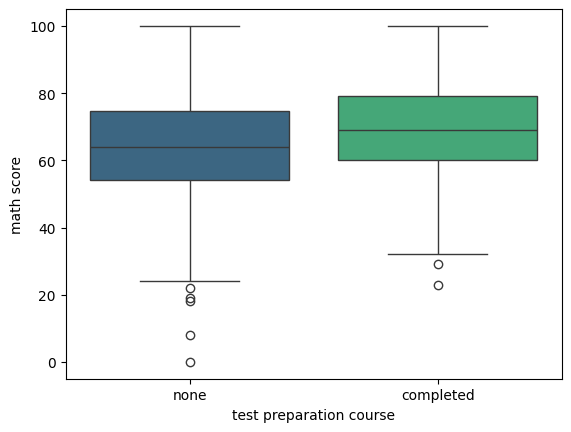

In [ ]:
#Boxplot of math score by test preparation course
sns.boxplot(data= df, x= 'test preparation course', y = 'math score', palette='viridis');

In [ ]:
#Grouping the DataFrame by test preparation course column and calculating the descriptive statistics for the writing score column
df.groupby(by = ['test preparation course']).describe()['writing score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


The median score is higher for students who have completed a course than for those who have not.

The dispersion of the data is similar, but the group that did not take the course has more outliers, or extremely low values.

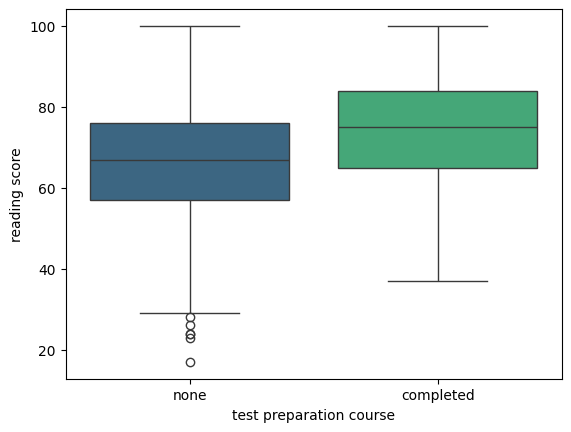

In [ ]:
#Boxplot of test preparation course by reading score
sns.boxplot(data= df, x= 'test preparation course', y = 'reading score', palette='viridis');

In [ ]:
#Grouping the DataFrame by test preparation course column and calculating the descriptive statistics for the reading score column
df.groupby(by = ['test preparation course']).describe()['reading score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
1,none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


The median for students who have completed a course is higher than for those who have not.

The dispersion of the data is similar, but those who didn't take the course have more outliers (extremely low values).

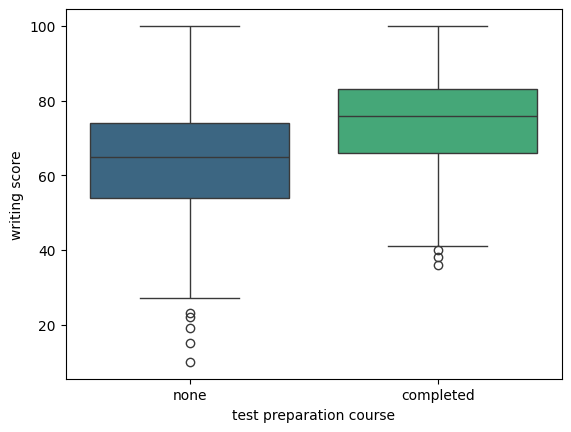

In [ ]:
#Boxplot of test preparation course by writing score
sns.boxplot(data= df, x= 'test preparation course', y = 'writing score' , palette='viridis');

In [ ]:
#Grouping the DataFrame by test preparation course column and calculating the descriptive statistics for the writing score column
df.groupby(by = ['test preparation course']).describe()['writing score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
1,none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


the median is significantly higher for those who have completed the course.

The outliers are concentrated among those who didn't take the course.

_______________

## **General Conclusion**
In all subjects, students who completed the preparatory course tended to perform better.

The reduction in negative outliers and the increase in medians indicate that the course is effective in improving academic performance.